### Individual Project
Syrota Serhii AI-2

### Goal

Predict house prices using dataset https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

1. Use three different sampling methods
  - simple random sampling
  - Bernoulli
  - systematic
2. Examine solution on this smaller dataset
3. For dataset of different sizes - determine their accuracy

### About dataset

A simple yet challenging project, to predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc. The dataset is small yet, it's complexity arises due to the fact that it has strong multicollinearity.

In [2]:
import pandas as pd
df = pd.read_csv('/app/dataset.csv')

In [5]:
df.shape
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### Implementation

1. Load and prepare data
2. Split dataset
3. Train model
4. Evaluate performance based on sample size & sampling method

In [38]:
import sklearn
from sklearn.preprocessing import MinMaxScaler

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('price')

scaler = MinMaxScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

df_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,0.396564,0.6,0.333333,0.666667,0.666667,True,False,False,False,True,True,False,False
1,12250000,0.502405,0.6,1.000000,1.000000,1.000000,True,False,False,False,True,False,False,False
2,12250000,0.571134,0.4,0.333333,0.333333,0.666667,True,False,True,False,False,True,True,False
3,12215000,0.402062,0.6,0.333333,0.333333,1.000000,True,False,True,False,True,True,False,False
4,11410000,0.396564,0.6,0.000000,0.333333,0.666667,True,True,True,False,True,False,False,False


### Sampling data

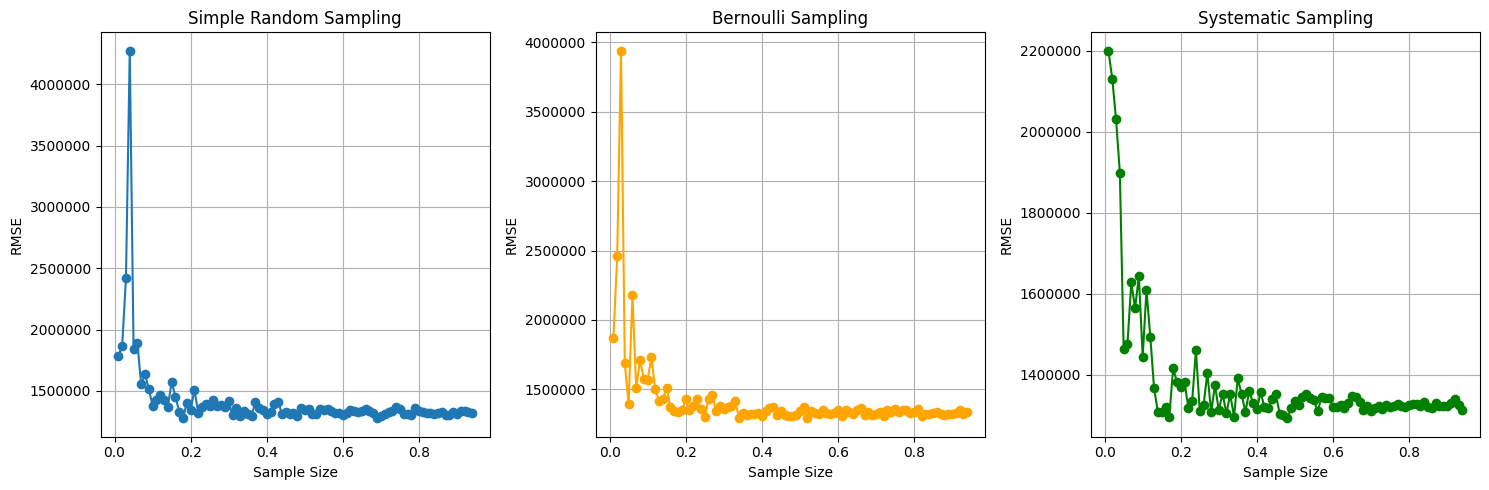

In [44]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

class Dataset:
    def __init__(self, data, test_size=0.2, random_state=42):
        self.data = data
        self.test_size = test_size
        self.random_state = random_state
        self.X = data.drop('price', axis=1)
        self.y = data['price']
        
    def get_simple_random_sample(self, sample_size):
        X_train, X_test, y_train, y_test = train_test_split(
            self.X, self.y, test_size=self.test_size, random_state=self.random_state
        )
        sample_indices = np.random.choice(
            len(X_train), 
            size=int(len(X_train) * sample_size), 
            replace=False
        )
        X_train = X_train.iloc[sample_indices]
        y_train = y_train.iloc[sample_indices]
            
        return X_train, X_test, y_train, y_test
    
    def get_bernoulli_sample(self, p):
        X_train, X_test, y_train, y_test = train_test_split(
            self.X, self.y, test_size=self.test_size, random_state=self.random_state
        )
        bernoulli_mask = np.random.binomial(1, p, size=len(X_train)).astype(bool)
        X_train = X_train.loc[bernoulli_mask]
        y_train = y_train.loc[bernoulli_mask]
            
        return X_train, X_test, y_train, y_test
    
    def get_systematic_sample(self, sample_size):
        X_train, X_test, y_train, y_test = train_test_split(
            self.X, self.y, test_size=self.test_size, random_state=self.random_state
        )

        train_size = int(len(self.X) * sample_size)
        step = len(X_train) / train_size
        indices = np.floor(np.arange(0, len(X_train), step)).astype(int)
        indices = indices[:train_size]
        X_train = X_train.iloc[indices]
        y_train = y_train.iloc[indices]
            
        return X_train, X_test, y_train, y_test
    
    def get_sample_sizes(self):
        return [round(i * 0.01, 2) for i in range(1, 95)]

def evaluate_model( X_train, X_test, y_train, y_test):
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  return np.sqrt(mean_squared_error(y_test, y_pred))

dataset = Dataset(df_encoded)

# Initialize dictionaries to store samples and results
rss_rmse = []
bernoulli_rmse = []
systematic_rmse = []
sample_sizes = dataset.get_sample_sizes()

# Get samples and train models for each sample size
for size in sample_sizes:
    # Simple Random Sampling
    X_train, X_test, y_train, y_test = dataset.get_simple_random_sample(size)
    rss_rmse.append(evaluate_model(X_train, X_test, y_train, y_test))

    # Bernoulli Sampling
    X_train, X_test, y_train, y_test = dataset.get_bernoulli_sample(size)
    bernoulli_rmse.append(evaluate_model(X_train, X_test, y_train, y_test))
    
    # Systematic Sampling
    X_train, X_test, y_train, y_test = dataset.get_systematic_sample(size)
    systematic_rmse.append(evaluate_model(X_train, X_test, y_train, y_test))

# Visualize results
plt.figure(figsize=(15, 5))

# Plot for Simple Random Sampling
plt.subplot(1, 3, 1)
plt.plot(sample_sizes, rss_rmse, marker='o')
plt.title('Simple Random Sampling')
plt.xlabel('Sample Size')
plt.ylabel('RMSE')
plt.ticklabel_format(style='plain', axis='both', useOffset=False)
plt.grid(True)

# Plot for Bernoulli Sampling
plt.subplot(1, 3, 2)
plt.plot(sample_sizes, bernoulli_rmse, marker='o', color='orange')
plt.title('Bernoulli Sampling')
plt.xlabel('Sample Size')
plt.ylabel('RMSE')
plt.ticklabel_format(style='plain', axis='both', useOffset=False)
plt.grid(True)

# Plot for Systematic Sampling
plt.subplot(1, 3, 3)
plt.plot(sample_sizes, systematic_rmse, marker='o', color='green')
plt.title('Systematic Sampling')
plt.xlabel('Sample Size')
plt.ylabel('RMSE')
plt.ticklabel_format(style='plain', axis='both', useOffset=False)
plt.grid(True)
plt.tight_layout()
plt.show()
